# Análise da Modulação MFSK com base no script `mfsk.m`

Dado o script `mfsk.m`, disponível no SIGAA, descreva e/ou responda às questões abaixo:

---

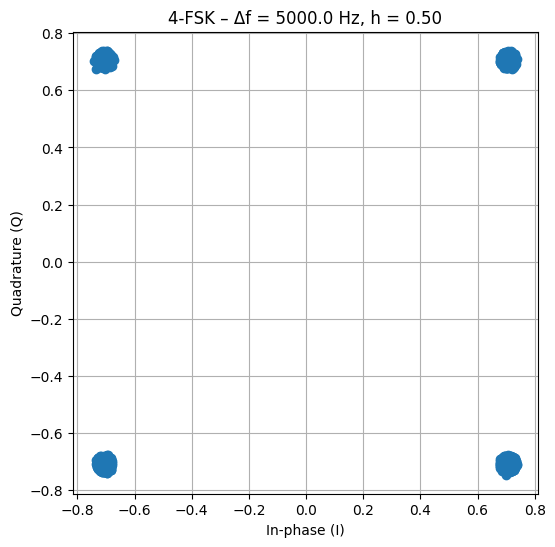

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import resample
from numpy.random import randint
from scipy.special import erfc

# Parâmetros do sistema
Eb = 45e-6        # Energia por bit (não usado diretamente)
N0 = 1e-6         # Densidade espectral de potência (idem)
M = 4             # Ordem da modulação (M-FSK)
Nsym = int(2e4)   # Número de símbolos

Rb = 10e3         # Taxa de bits (bits/s)
Fs = 100e3        # Frequência de amostragem (Hz)
Ns = int(Fs / Rb) # Amostras por símbolo

freqSep = Rb / 2  # Separação de frequência Δf

# Geração dos dados aleatórios
data = randint(0, M, size=Nsym)

# Tempo de um símbolo
tSym = np.arange(Ns) / Fs

# Pré-alocação do vetor de saída
y_fsk = np.zeros(Nsym * Ns, dtype=complex)

# Frequência central (usada para sinal complexo baseband)
fc = 0

# Geração do sinal FSK
for k in range(Nsym):
    m = data[k]
    f_k = fc + (m - (M - 1) / 2) * freqSep
    idx_start = k * Ns
    y_fsk[idx_start:idx_start+Ns] = np.exp(1j * 2 * np.pi * f_k * tSym)

# Canal com atenuação
atten = 1  # 0.5 ⇒ perda de 50%
y_chan = y_fsk * atten

# Adição de ruído AWGN com Eb/N0
EbN0_dB = 45
SNR_dB = EbN0_dB + 10 * np.log10(np.log2(M)) - 10 * np.log10(Ns)

# Cálculo da potência do sinal
signal_power = np.mean(np.abs(y_chan)**2)
SNR_linear = 10 ** (SNR_dB / 10)
noise_power = signal_power / SNR_linear

# Geração de ruído complexo
noise = np.sqrt(noise_power / 2) * (np.random.randn(len(y_chan)) + 1j * np.random.randn(len(y_chan)))
y_noise = y_chan + noise

# Extração de uma amostra por símbolo (amostra do meio)
midSamp = int(Ns / 2)
pts = y_noise[midSamp::Ns]

# Plot da constelação
plt.figure(figsize=(6, 6))
plt.grid(True)
plt.axis('equal')
plt.scatter(np.real(pts), np.imag(pts))
plt.title(f'{M}-FSK – Δf = {freqSep:.1f} Hz, h = {freqSep / Rb:.2f}')
plt.xlabel('In-phase (I)')
plt.ylabel('Quadrature (Q)')
plt.show()


### a) Frequências dos símbolos (M = 4, Rb = 10 kHz, freqSep = 5 kHz)

Dado:
- $ M = 4 $
- $ R_b = 10~\text{kHz} $
- $ \text{freqSep} = 5~\text{kHz} $

As quatro frequências usadas para representar os símbolos $0, 1, 2, 3$ são:

$$
f_i = fc + (m - \frac{(M-1)}{2})·\Delta f, \quad i = 1, 2, 3, 4
$$

Assumindo uma frequência central $f_c$, as frequências relativas para os símbolos são:

- Símbolo 0: $ f_0 = f_c - 7500~\text{Hz} $
- Símbolo 1: $ f_1 = f_c - 2500~\text{Hz} $
- Símbolo 2: $ f_2 = f_c + 2500~\text{Hz} $
- Símbolo 3: $ f_3 = f_c + 7500~\text{Hz} $

---

### b) Índice de modulação e ortogonalidade

O índice de modulação $ h $ é dado por:

$$
h = \frac{\Delta f}{R_b}
$$

No caso da modulação **MFSK (Multiple Frequency Shift Keying)**, os tons são ortogonais quando a separação de frequência $ \Delta f $ é **um múltiplo inteiro da taxa de bits**:

$$
\Delta f = k \cdot R_b \quad \Rightarrow \quad h = k
$$

Logo, a **modulação MFSK se torna ortogonal quando $ h $ é inteiro**: $ h = 1, 2, 3, \dots $

> Por outro lado, em **MSK (Minimum Shift Keying)** — uma forma especial de FSK com fase contínua — a ortogonalidade mínima ocorre para:
>
> $$
> h = \frac{1}{2} \Rightarrow \Delta f = \frac{R_b}{2}
> $$
>
> Essa é a menor separação de frequência que ainda garante ortogonalidade **com continuidade de fase**.

---

### c) Amostragem (Rb = 10 kHz, Fs = 100 kHz)

$$
R_b = 10~\text{kHz}, \quad F_s = 100~\text{kHz}
$$

O número de amostras por símbolo é:

$$
\text{Samples/símbolo} = \frac{F_s}{R_b} = \frac{100~\text{kHz}}{10~\text{kHz}} = 10
$$

Se $ F_s $ **não for múltiplo de** $ R_b $, a quantidade de amostras por símbolo não será um número inteiro, dificultando a geração e a detecção precisa dos símbolos, além de poder introduzir **aliasing** e **erros de sincronização**, gerando uma distorção na constelação.

---

### d) Atenuação do sinal: `y_chan = y_fsk * 0.5`

Multiplicar o sinal por 0.5 equivale a atenuar sua amplitude:

$$
y_{\text{chan}} = 0.5 \cdot y_{\text{fsk}}
$$

A **energia média do sinal** é proporcional ao **quadrado da amplitude**. Portanto, a energia será reduzida por um fator de:

$$
(0.5)^2 = 0.25
$$

Logo, a **energia média torna-se 25%** do valor original.

---

### e) Efeito do ruído AWGN na constelação I/Q

Ao adicionar ruído com a função `awgn`, o sinal se torna corrompido por **ruído branco gaussiano aditivo**, afetando sua representação na constelação I/Q.

- Com $ E_b/N_0 $ **alto**, o sinal apresenta **alta razão sinal-ruído**, ou seja, os pontos da constelação permanecem **concentrados** e **claramente definidos**.
- Com $ E_b/N_0 $ **baixo**, os pontos se tornam **espalhados** devido ao ruído, aumentando a **probabilidade de erro** na detecção dos símbolos.

Visualmente:
- $ E_b/N_0 $ alto -> pontos bem agrupados
- $ E_b/N_0 $ baixo -> pontos dispersos e sobrepostos